# Project Neural Networks e Deep Learning

<hr style="border: none; height: 2px; background-color: black; margin: 0;">

### Importando Bibliotecas 

In [252]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from keras.optimizers import Adam
from sklearn.base import BaseEstimator, ClassifierMixin
from keras.layers import Dense, Dropout

<hr style="border: none; height: 2px; background-color: black; margin: 0;">

### Carregando dados

In [253]:
dados = pd.read_csv('dados/soybean.csv')

<hr style="border: none; height: 2px; background-color: black; margin: 0;">

### Pré-processamento dos dados

In [254]:
dados.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


Formato dos dados

In [255]:
print('Quantidade de Linhas: ', dados.shape[0])
print('Quantidade de Colunas: ', dados.shape[1])

Quantidade de Linhas:  683
Quantidade de Colunas:  36


Tipos dos dados

In [256]:
dados.dtypes

date               object
plant-stand        object
precip             object
temp               object
hail               object
crop-hist          object
area-damaged       object
severity           object
seed-tmt           object
germination        object
plant-growth       object
leaves             object
leafspots-halo     object
leafspots-marg     object
leafspot-size      object
leaf-shread        object
leaf-malf          object
leaf-mild          object
stem               object
lodging            object
stem-cankers       object
canker-lesion      object
fruiting-bodies    object
external-decay     object
mycelium           object
int-discolor       object
sclerotia          object
fruit-pods         object
fruit-spots        object
seed               object
mold-growth        object
seed-discolor      object
seed-size          object
shriveling         object
roots              object
class              object
dtype: object

### Transformação dos dados 

O método utilizado abaixo é um procedimento de pré-processamento chamado "Label Encoding" ou "Codificação de Rótulos". O Label Encoding é uma técnica usada para transformar variáveis categóricas (ou seja, dados em formato de texto ou rótulos) em valores numéricos, tornando-os adequados para serem usados em algoritmos de aprendizado de máquina que requerem valores numéricos como entrada.

In [257]:
label_encoders = []
for i in range(dados.shape[1]):
    label_encoder = LabelEncoder()
    dados.iloc[:, i] = label_encoder.fit_transform(dados.iloc[:, i])
    label_encoders.append(label_encoder)

C:\Users\rafae\AppData\Local\Temp\ipykernel_7284\1260676894.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dados.iloc[:, i] = label_encoder.fit_transform(dados.iloc[:, i])
C:\Users\rafae\AppData\Local\Temp\ipykernel_7284\1260676894.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dados.iloc[:, i] = label_encoder.fit_transform(dados.iloc[:, i])
C:\Users\rafae\AppData\Local\Temp\ipykernel_7284\1260676894.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always se

Divisão dos dados que serão usados para o modelo e a classe

In [258]:
previsores = dados.iloc[:, :-1]
classe = dados.iloc[:, -1]

Transformação da classe para o formato "dummy"

In [259]:
classe_dummy = to_categorical(classe)
classe_dummy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Formato dos dados 

In [260]:
print('Quantidade de Linhas: ', classe_dummy.shape[0])
print('Quantidade de Colunas: ', classe_dummy.shape[1])

Quantidade de Linhas:  683
Quantidade de Colunas:  19


Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)

In [261]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe_dummy,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

## Métodos 

## Redes neurais artificiais

Criação da estrutura da rede neural com a classe Sequential (sequência de camadas)

In [262]:
del modelo
modelo = Sequential()

Primeira camada oculta, 16 neuronios, 35 neuronios de entrada

In [263]:
modelo.add(Dense(units=18, input_dim=35, activation='relu'))

Segunda camada oculta

In [264]:
modelo.add(Dense(units=19, activation='softmax'))

 Função softmax porque temos um problema de classificação com mais de duas classes 
(é gerada uma probabilidade em cada neurônio)

Visualização da estrutura da rede neural

In [265]:
modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 18)                648       
                                                                 
 dense_53 (Dense)            (None, 19)                361       
                                                                 
Total params: 1009 (3.94 KB)
Trainable params: 1009 (3.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Configuração dos parâmetros da rede neural (adam = algoritmo para atualizar os pesos e loss = cálculo do erro)

In [266]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Treinamento, dividindo a base de treinamento em uma porção para validação (validation_data)

In [267]:
modelo.fit(X_treinamento, y_treinamento, epochs=400, validation_data=(X_teste, y_teste))

Epoch 1/400
15/15 [==============================] - 22s 309ms/step - loss: 3.1599 - accuracy: 0.1339 - val_loss: 2.9250 - val_accuracy: 0.1366
Epoch 2/400
15/15 [==============================] - 0s 22ms/step - loss: 2.8075 - accuracy: 0.1778 - val_loss: 2.7175 - val_accuracy: 0.2000
Epoch 3/400
15/15 [==============================] - 0s 11ms/step - loss: 2.6560 - accuracy: 0.2050 - val_loss: 2.6194 - val_accuracy: 0.2585
Epoch 4/400
15/15 [==============================] - 0s 16ms/step - loss: 2.5613 - accuracy: 0.2280 - val_loss: 2.5506 - val_accuracy: 0.2683
Epoch 5/400
15/15 [==============================] - 0s 11ms/step - loss: 2.4820 - accuracy: 0.2824 - val_loss: 2.4903 - val_accuracy: 0.3220
Epoch 6/400
15/15 [==============================] - 0s 17ms/step - loss: 2.4069 - accuracy: 0.3410 - val_loss: 2.4335 - val_accuracy: 0.3463
Epoch 7/400
15/15 [==============================] - 0s 9ms/step - loss: 2.3326 - accuracy: 0.3536 - val_loss: 2.3707 - val_accuracy: 0.3561
Epoch

Previsões

In [268]:
previsoes = modelo.predict(X_teste)

7/7 [==============================] - 1s 4ms/step


 Transformação dos rótulos (labels) de classe antes e depois da previsão feita pelo modelo de rede neural.

In [269]:
y_teste_matrix = [np.argmax(t) for t in y_teste]
y_previsao_matrix = [np.argmax(t) for t in previsoes]

Geração da matriz de confusão 

In [270]:
confusao = confusion_matrix(y_teste_matrix, y_previsao_matrix)
confusao

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0, 25,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  1,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  3,  0,  1,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 12,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0

 Matriz de confusão 

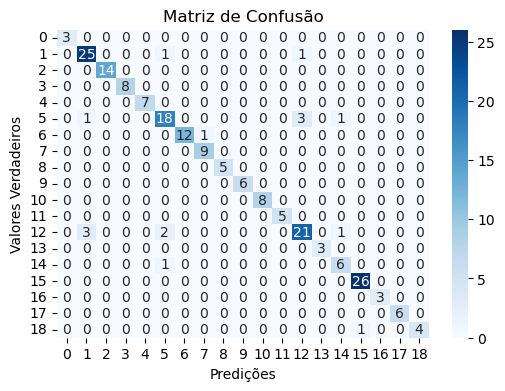

In [271]:
df = pd.DataFrame(confusao)
plt.figure(figsize=(6, 4))
sns.heatmap(df, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')
plt.show()

Acurácia

In [272]:
accuracy = accuracy_score(y_teste_matrix, y_previsao_matrix)
accuracy

0.9219512195121952

Precisão

In [273]:
precision = precision_score(y_teste_matrix, y_previsao_matrix, average='macro')
precision

0.9543796708769485

Recall

In [274]:
recall = recall_score(y_teste_matrix, y_previsao_matrix, average='macro')
recall

0.9508701147145082

F1-Score

In [275]:
f1 = f1_score(y_teste_matrix, y_previsao_matrix, average='macro')
f1

0.9514704650506668

<hr style="border: none; height: 2px; background-color: black; margin: 0;">

## Deep learning

Criação da estrutura da rede neural com a classe Sequential (sequência de camadas)

In [276]:
del modelo2
modelo2 = Sequential()

Camada densa com 18 neurônios e ativação ReLU, tendo uma entrada com 35 dimensões.
Camada de Dropout com taxa de 0.2 (desativação de 20% dos neurônios).

In [277]:
modelo2.add(Dense(units = 18, activation = 'relu', input_dim = 35))
modelo2.add(Dropout(0.2))

Outras duas camada densa com 18 neurônios cada e ativação ReLU. Outras camadas de Dropout com taxa de 0.2.

In [278]:
modelo2.add(Dense(units = 18, activation = 'relu'))
modelo2.add(Dropout(0.2))
modelo2.add(Dense(units = 18, activation = 'relu'))
modelo2.add(Dropout(0.2))

Camada de saída densa com 19 neurônios e ativação softmax.

In [279]:
modelo2.add(Dense(units = 19, activation = 'softmax'))

Informações detalhadas sobre as camadas e os parâmetros do modelo

In [280]:
modelo2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 18)                648       
                                                                 
 dropout_30 (Dropout)        (None, 18)                0         
                                                                 
 dense_55 (Dense)            (None, 18)                342       
                                                                 
 dropout_31 (Dropout)        (None, 18)                0         
                                                                 
 dense_56 (Dense)            (None, 18)                342       
                                                                 
 dropout_32 (Dropout)        (None, 18)                0         
                                                                 
 dense_57 (Dense)            (None, 19)               

Essa linha de código compila o modelo modelo2 com o otimizador 'adam', função de perda 'categorical_crossentropy' e usa a métrica de acurácia para avaliação. Em seguida, o modelo é treinado por 1000 épocas usando os dados de treinamento X_treinamento e y_treinamento, com validação usando os dados X_teste e y_teste, e o histórico de treinamento é armazenado na variável historico.

In [290]:
modelo2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
historico = modelo2.fit(X_treinamento, y_treinamento, epochs = 400, validation_data = (X_teste, y_teste))

Epoch 1/400
15/15 [==============================] - 6s 68ms/step - loss: 0.6003 - accuracy: 0.7636 - val_loss: 0.3273 - val_accuracy: 0.9073
Epoch 2/400
15/15 [==============================] - 0s 10ms/step - loss: 0.5812 - accuracy: 0.7929 - val_loss: 0.3063 - val_accuracy: 0.9073
Epoch 3/400
15/15 [==============================] - 0s 17ms/step - loss: 0.5881 - accuracy: 0.7699 - val_loss: 0.3086 - val_accuracy: 0.9122
Epoch 4/400
15/15 [==============================] - 0s 10ms/step - loss: 0.5491 - accuracy: 0.7992 - val_loss: 0.3148 - val_accuracy: 0.9122
Epoch 5/400
15/15 [==============================] - 0s 20ms/step - loss: 0.5780 - accuracy: 0.7887 - val_loss: 0.3120 - val_accuracy: 0.9171
Epoch 6/400
15/15 [==============================] - 0s 13ms/step - loss: 0.6099 - accuracy: 0.7803 - val_loss: 0.3258 - val_accuracy: 0.8927
Epoch 7/400
15/15 [==============================] - 0s 11ms/step - loss: 0.6020 - accuracy: 0.7803 - val_loss: 0.3048 - val_accuracy: 0.9220
Epoch 

Previsões

In [292]:
previsoes2 = modelo2.predict(X_teste)
previsoes2

7/7 [==============================] - 0s 1ms/step


array([[6.0458882e-10, 5.2116909e-03, 5.2697729e-12, ..., 6.2125084e-12,
        3.0115421e-10, 2.9174515e-17],
       [0.0000000e+00, 0.0000000e+00, 5.7585450e-11, ..., 3.1194515e-30,
        2.9449807e-35, 4.5127678e-18],
       [1.5229555e-08, 0.0000000e+00, 6.8175717e-14, ..., 0.0000000e+00,
        3.6231268e-18, 1.1838128e-14],
       ...,
       [1.6604155e-15, 2.0553649e-04, 3.5221712e-04, ..., 1.2579502e-08,
        9.5943636e-01, 2.6558673e-08],
       [1.0029839e-03, 5.3814344e-14, 6.5751176e-12, ..., 6.3271758e-19,
        1.1987663e-08, 2.7172499e-11],
       [1.3268726e-29, 2.0236391e-06, 1.2805326e-04, ..., 1.4830237e-09,
        9.0595968e-06, 6.1411374e-13]], dtype=float32)

Matriz de confusão

In [293]:
y_teste_matrix2 = [np.argmax(t) for t in y_teste]
y_previsoes_matrix2 = [np.argmax(t) for t in previsoes2]
confusao2 = confusion_matrix(y_teste_matrix2, y_previsoes_matrix2)
confusao2

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  1,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  1,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0

Gráfico da matriz de confusão para melhor visualização 

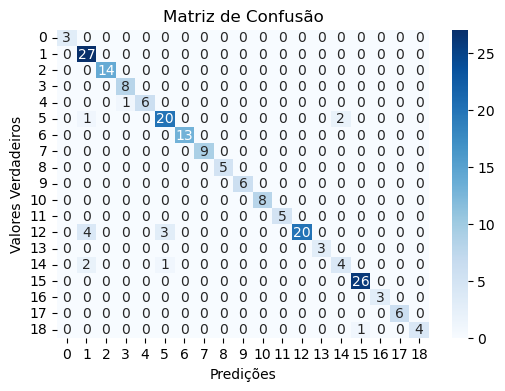

In [294]:
df2 = pd.DataFrame(confusao2)
plt.figure(figsize=(6, 4))
sns.heatmap(df2, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')
plt.show()

Acurácia

In [295]:
accuracy2 = accuracy_score(y_teste_matrix2, y_previsoes_matrix2)
accuracy2

0.926829268292683

Precisão

In [296]:
precision2 = precision_score(y_teste_matrix, y_previsoes_matrix2, average='macro')
precision2

0.9550510262584565

Recall

In [297]:
recall2 = recall_score(y_teste_matrix, y_previsoes_matrix2, average='macro')
recall2

0.9388882835107091

F1-Score

In [298]:
f12 = f1_score(y_teste_matrix, y_previsoes_matrix2, average='macro')
f12

0.944054343927588

<hr style="border: none; height: 2px; background-color: black; margin: 0;">